In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('World_development_mesurement (3).xlsx')
pd.set_option('display.max_columns',None)
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,0.034,0.0,0.100,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,0.128,0.0,1.032,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,0.090,0.0,NaN,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,0.054,0.0,0.155,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,0.096,0.0,NaN,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [4]:
df[df.duplicated()]

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound


In [5]:
df.isna().sum()/100

Birth Rate                 1.19
Business Tax Rate         12.81
CO2 Emissions              5.79
Country                    0.00
Days to Start Business     9.86
Ease of Business          25.19
Energy Usage               9.19
GDP                        2.10
Health Exp % GDP           3.09
Health Exp/Capita          3.09
Hours to do Tax           12.88
Infant Mortality Rate      2.60
Internet Usage             1.73
Lending Interest           8.24
Life Expectancy Female     1.36
Life Expectancy Male       1.36
Mobile Phone Usage         1.67
Number of Records          0.00
Population 0-14            2.20
Population 15-64           2.20
Population 65+             2.20
Population Total           0.00
Population Urban           0.26
Tourism Inbound            3.68
Tourism Outbound           4.71
dtype: float64

In [6]:
df.drop(['Business Tax Rate','Ease of Business','Hours to do Tax','Days to Start Business','Energy Usage','Lending Interest'],inplace=True,axis =1)

In [7]:
df.isna().sum()/100

Birth Rate                1.19
CO2 Emissions             5.79
Country                   0.00
GDP                       2.10
Health Exp % GDP          3.09
Health Exp/Capita         3.09
Infant Mortality Rate     2.60
Internet Usage            1.73
Life Expectancy Female    1.36
Life Expectancy Male      1.36
Mobile Phone Usage        1.67
Number of Records         0.00
Population 0-14           2.20
Population 15-64          2.20
Population 65+            2.20
Population Total          0.00
Population Urban          0.26
Tourism Inbound           3.68
Tourism Outbound          4.71
dtype: float64

In [8]:
df.drop(['Country'],inplace=True,axis =1)

In [9]:
df.select_dtypes(['object'])

,GDP,Health Exp/Capita,Tourism Inbound,Tourism Outbound
0,"$54,790,058,957",$60,"$102,000,000","$193,000,000"
1,"$9,129,594,819",$22,"$34,000,000","$146,000,000"
2,"$2,359,122,303",$15,"$77,000,000","$50,000,000"
3,"$5,788,311,645",$152,"$227,000,000","$209,000,000"
4,"$2,610,959,139",$12,"$23,000,000","$30,000,000"
...,...,...,...,...
2699,NaN,NaN,NaN,NaN
2700,"$16,244,600,000,000","$8,895","$200,092,000,000","$126,573,000,000"
2701,"$50,004,354,667","$1,308","$2,222,000,000","$1,028,000,000"
2702,"$381,286,223,859",$593,"$904,000,000","$3,202,000,000"


In [10]:
df['GDP']=df['GDP'].str.replace('$', '')
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace('$','')
df['Tourism Inbound']=df['Tourism Inbound'].str.replace('$','')
df['Tourism Outbound']=df['Tourism Outbound'].str.replace('$','')

In [11]:
df['GDP']=df['GDP'].str.replace(',', '')
df['Health Exp/Capita']=df['Health Exp/Capita'].str.replace(',','')
df['Tourism Inbound']=df['Tourism Inbound'].str.replace(',','')
df['Tourism Outbound']=df['Tourism Outbound'].str.replace(',','') 

In [12]:
df.head()

,Birth Rate,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,54790058957,0.035,60,0.034,0.0,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,9542.0,9129594819,0.034,22,0.128,0.0,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,0.043,1617.0,2359122303,0.043,15,0.090,0.0,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,0.027,4276.0,5788311645,0.047,152,0.054,0.0,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,0.046,1041.0,2610959139,0.051,12,0.096,0.0,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000,30000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   GDP                     2494 non-null   object 
 3   Health Exp % GDP        2395 non-null   float64
 4   Health Exp/Capita       2395 non-null   object 
 5   Infant Mortality Rate   2444 non-null   float64
 6   Internet Usage          2531 non-null   float64
 7   Life Expectancy Female  2568 non-null   float64
 8   Life Expectancy Male    2568 non-null   float64
 9   Mobile Phone Usage      2537 non-null   float64
 10  Number of Records       2704 non-null   int64  
 11  Population 0-14         2484 non-null   float64
 12  Population 15-64        2484 non-null   float64
 13  Population 65+          2484 non-null   float64
 14  Population Total        2704 non-null   

In [14]:
df['GDP']=df['GDP'].astype(float)
df['Health Exp/Capita']=df['Health Exp/Capita'].astype(float)
df['Tourism Inbound']=df['Tourism Inbound'].astype(float)
df['Tourism Outbound']=df['Tourism Outbound'].astype(float)

In [15]:
df['Tourism Inbound']=df['Tourism Inbound']/1000000
df['Tourism Outbound']=df['Tourism Outbound']/1000000

In [18]:
df.head()

,Birth Rate,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,5.479006e+10,0.035,60.0,0.034,0.0,71.0,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102.0,193.0
1,0.050,9542.0,9.129595e+09,0.034,22.0,0.128,0.0,47.0,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34.0,146.0
2,0.043,1617.0,2.359122e+09,0.043,15.0,0.090,0.0,57.0,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77.0,50.0
3,0.027,4276.0,5.788312e+09,0.047,152.0,0.054,0.0,52.0,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227.0,209.0
4,0.046,1041.0,2.610959e+09,0.051,12.0,0.096,0.0,52.0,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23.0,30.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   GDP                     2494 non-null   float64
 3   Health Exp % GDP        2395 non-null   float64
 4   Health Exp/Capita       2395 non-null   float64
 5   Infant Mortality Rate   2444 non-null   float64
 6   Internet Usage          2531 non-null   float64
 7   Life Expectancy Female  2568 non-null   float64
 8   Life Expectancy Male    2568 non-null   float64
 9   Mobile Phone Usage      2537 non-null   float64
 10  Number of Records       2704 non-null   int64  
 11  Population 0-14         2484 non-null   float64
 12  Population 15-64        2484 non-null   float64
 13  Population 65+          2484 non-null   float64
 14  Population Total        2704 non-null   

In [20]:
df['GDP'].median()

15079752557.5

Fill missing values with median values

In [21]:
for i in df.columns:
    median = df[i].median()
    df.fillna(value=median,inplace=True)

In [22]:
df.isna().sum()

Birth Rate                0
CO2 Emissions             0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

Feature Selection

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
df.columns 

Index(['Birth Rate', 'CO2 Emissions', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [25]:
variables = df[['Birth Rate', 'CO2 Emissions', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound']] 
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,16.287705,Birth Rate
1,3.036484,CO2 Emissions
2,7.324833,GDP
3,1.573791,Health Exp % GDP
4,3.164275,Health Exp/Capita
5,4.791607,Infant Mortality Rate
6,4.961815,Internet Usage
7,105.501459,Life Expectancy Female
8,101.055499,Life Expectancy Male
9,2.803954,Mobile Phone Usage


Remove the features  in the original data above 10 vif values

In [26]:
df.drop(['Birth Rate','Life Expectancy Female','Life Expectancy Male','Population 0-14','Number of Records'],inplace=True,axis = 1)

In [27]:
df.head()

,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,87931.0,5.479006e+10,0.035,60.0,0.034,0.0,0.0,0.619,0.039,31719449,0.599,102.0,193.0
1,9542.0,9.129595e+09,0.034,22.0,0.128,0.0,0.0,0.499,0.025,13924930,0.324,34.0,146.0
2,1617.0,2.359122e+09,0.043,15.0,0.090,0.0,0.0,0.517,0.029,6949366,0.383,77.0,50.0
3,4276.0,5.788312e+09,0.047,152.0,0.054,0.0,0.1,0.587,0.029,1755375,0.532,227.0,209.0
4,1041.0,2.610959e+09,0.051,12.0,0.096,0.0,0.0,0.505,0.028,11607944,0.178,23.0,30.0


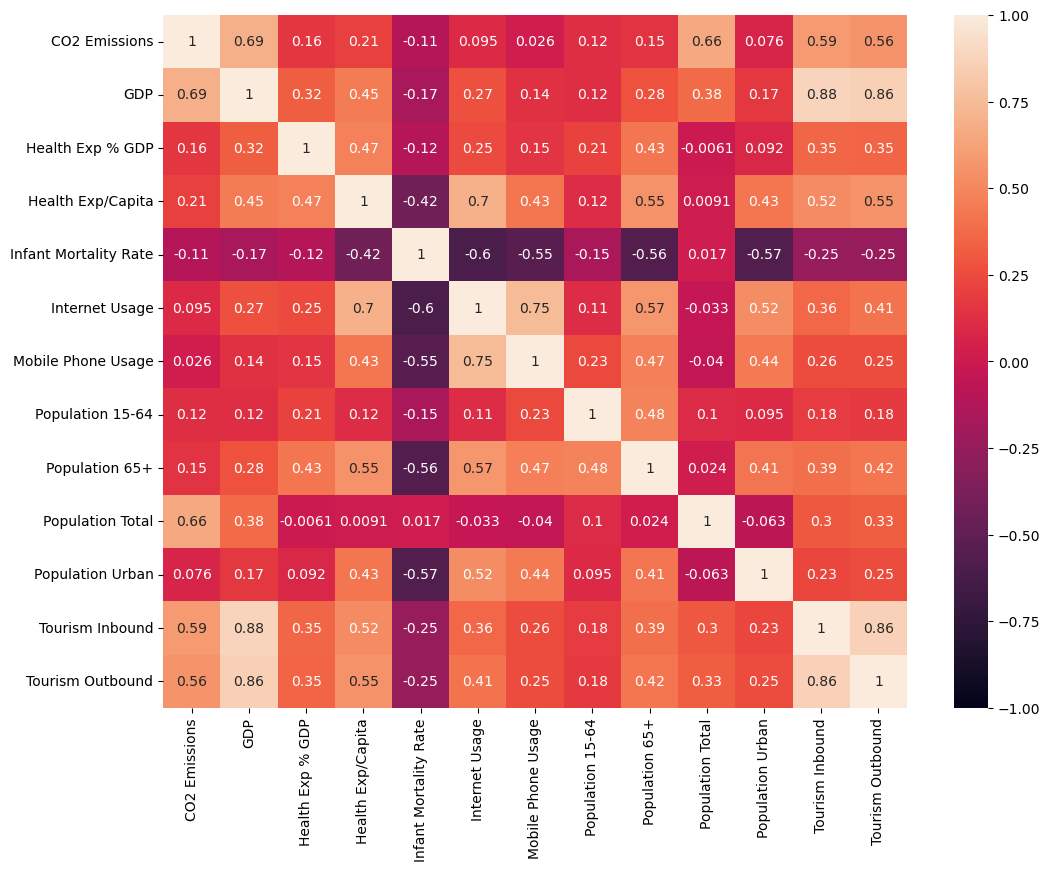

In [28]:
plt.figure(figsize =(12,9))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [29]:
from sklearn.feature_selection import VarianceThreshold
X = df.copy()
variance = VarianceThreshold(threshold=0)
variance.fit_transform(X)
print(variance.get_support())
print(variance.get_feature_names_out())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
['CO2 Emissions' 'GDP' 'Health Exp % GDP' 'Health Exp/Capita'
 'Infant Mortality Rate' 'Internet Usage' 'Mobile Phone Usage'
 'Population 15-64' 'Population 65+' 'Population Total' 'Population Urban'
 'Tourism Inbound' 'Tourism Outbound']


EDA

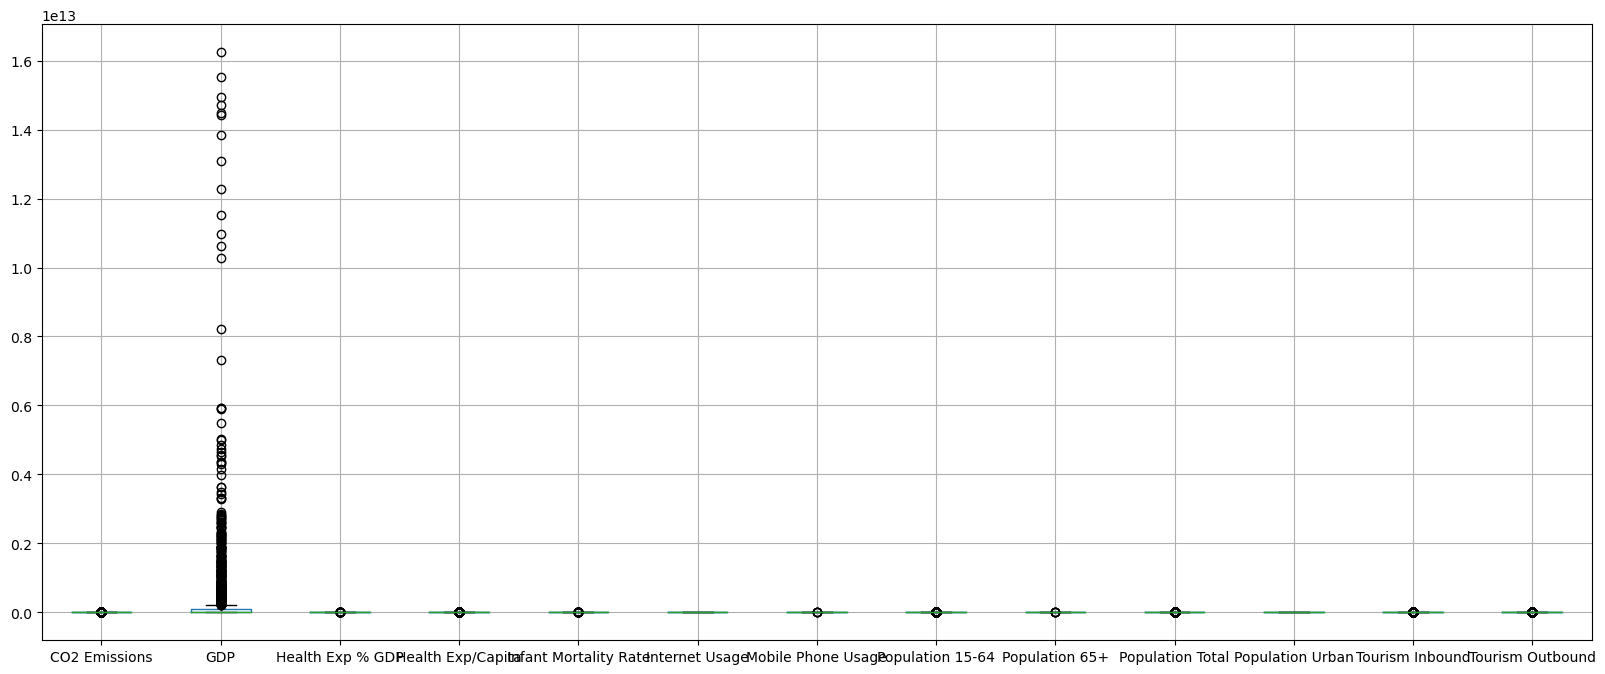

In [30]:
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

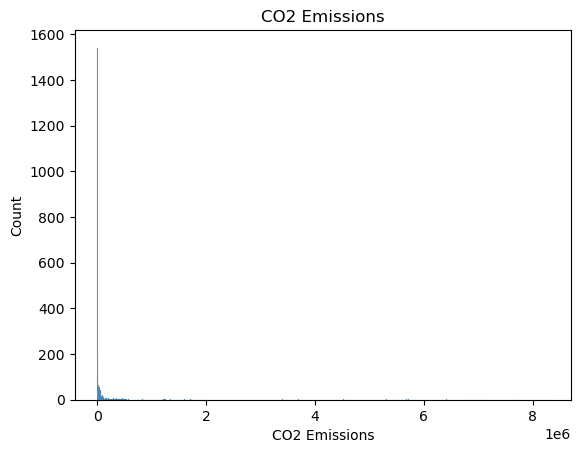

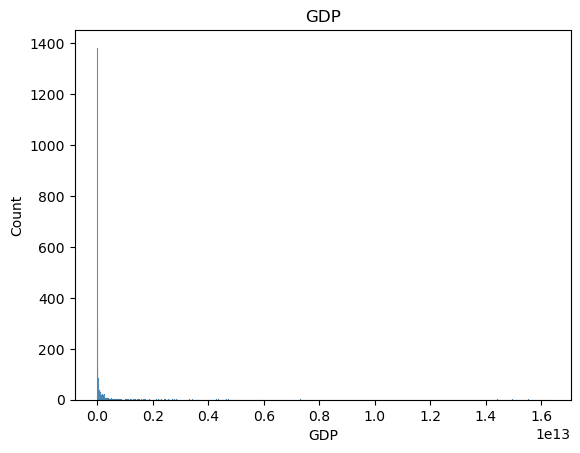

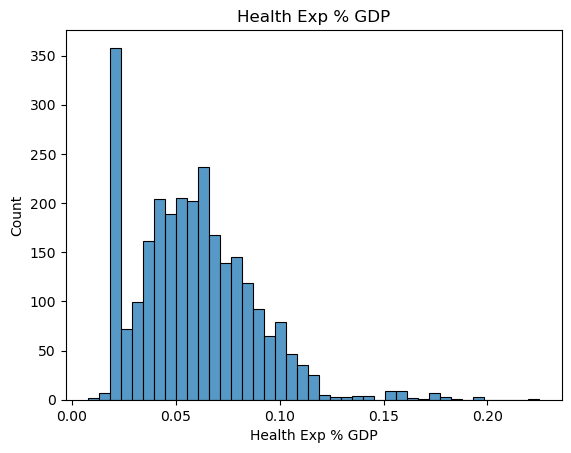

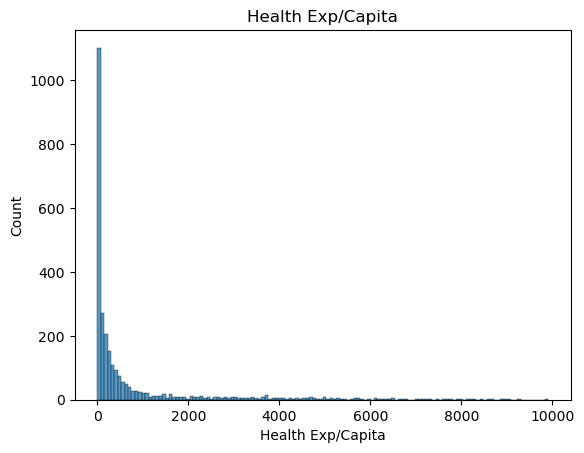

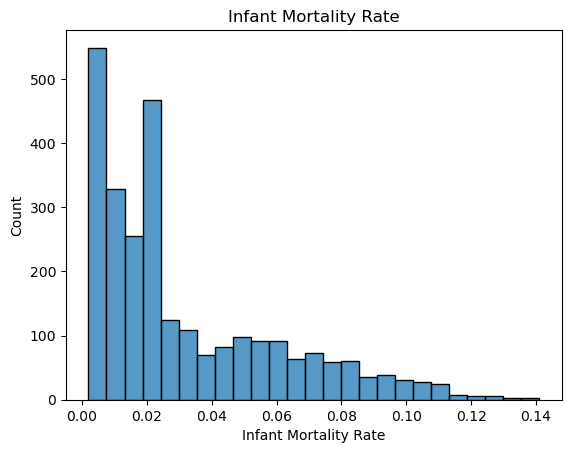

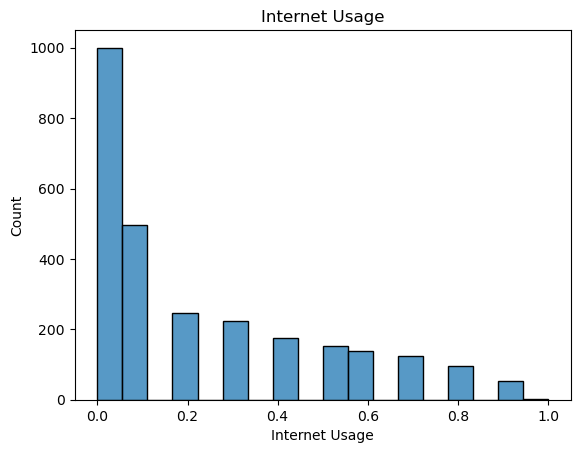

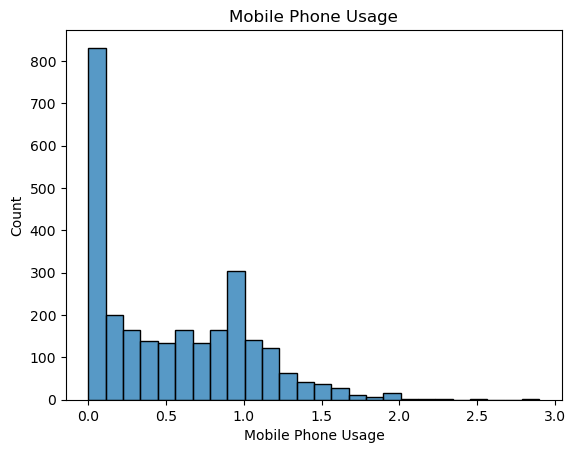

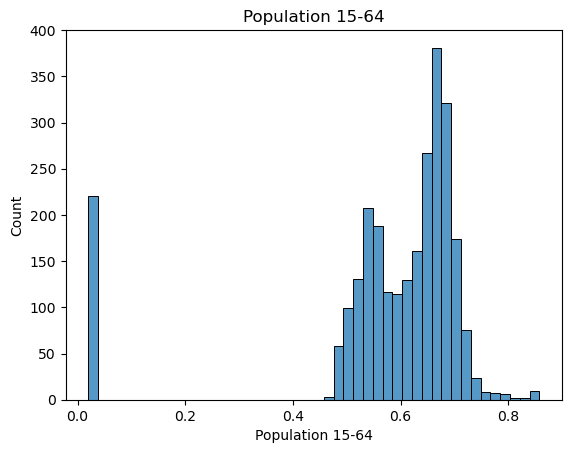

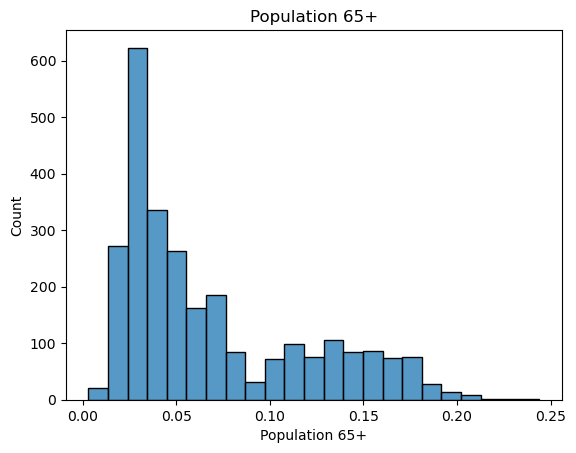

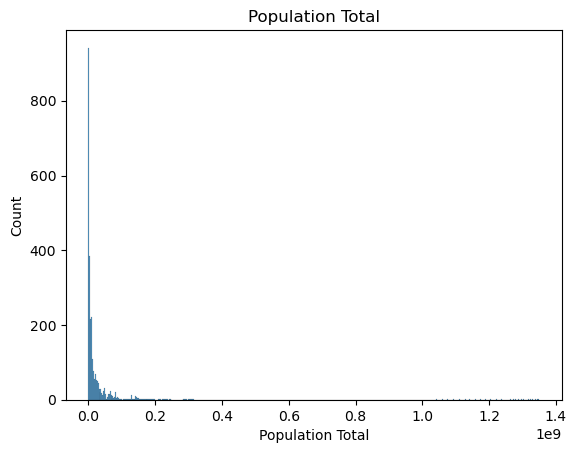

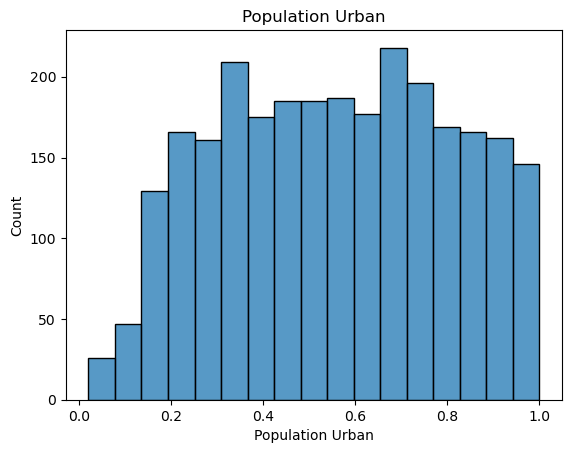

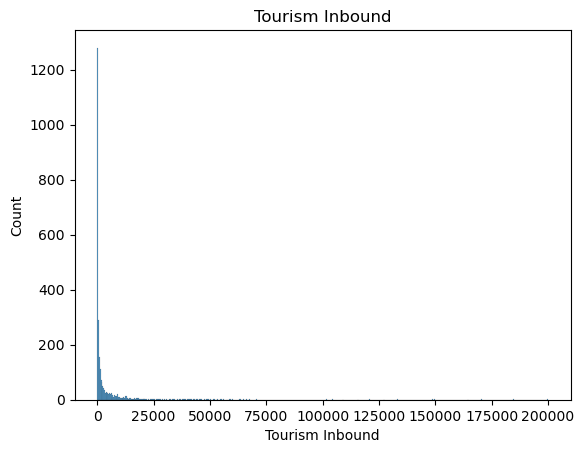

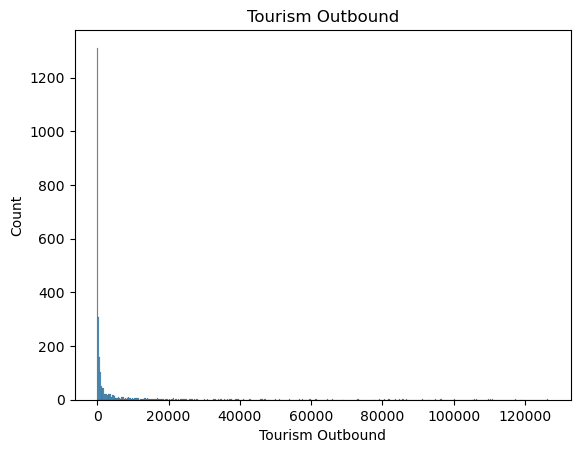

In [31]:
for i in df.columns:
    sns.histplot(x=df[i])
    plt.title(i)
    plt.show()

Feature Scaling 

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()
sc_data=sc.fit_transform(df)
sc_data

array([[-0.04354138, -0.17344358, -0.84703679, ...,  0.16484977,
        -0.32083224, -0.30463925],
       [-0.18632603, -0.21544079, -0.88215143, ..., -0.9336661 ,
        -0.32607018, -0.30849582],
       [-0.20076133, -0.22166809, -0.56611967, ..., -0.69798451,
        -0.32275796, -0.31637307],
       ...,
       [-0.20370664, -0.17784533,  1.04915374, ...,  1.55896627,
        -0.1575317 , -0.23612355],
       [-0.20370664,  0.12685845, -0.46077575, ...,  1.32328468,
        -0.25905534, -0.05773658],
       [-0.20370664, -0.22383794, -1.37375638, ...,  1.56296087,
        -0.32868761, -0.32047417]])

In [34]:
sc=pd.DataFrame(sc_data,columns = df.columns)
sc

,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,-0.043541,-0.173444,-0.847037,-0.460975,0.084186,-0.877121,-1.135219,0.250697,-0.606260,0.002110,0.164850,-0.320832,-0.304639
1,-0.186326,-0.215441,-0.882151,-0.487932,3.355575,-0.877121,-1.135219,-0.423546,-0.888104,-0.141087,-0.933666,-0.326070,-0.308496
2,-0.200761,-0.221668,-0.566120,-0.492898,2.033099,-0.877121,-1.135219,-0.322410,-0.807577,-0.197221,-0.697985,-0.322758,-0.316373
3,-0.195918,-0.218514,-0.425661,-0.395711,0.780226,-0.877121,-0.926406,0.070899,-0.807577,-0.239018,-0.102789,-0.311204,-0.303326
4,-0.201811,-0.221436,-0.285203,-0.495026,2.241911,-0.877121,-1.135219,-0.389834,-0.827708,-0.159732,-1.516878,-0.326917,-0.318014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,-0.203707,-0.223838,-1.373756,-0.503524,-0.403042,-0.799393,-1.093456,-3.114897,-0.988762,-0.252883,1.411166,-0.328688,-0.320474
2700,-0.203707,14.717490,4.209471,5.806479,-0.890270,2.232027,0.952909,0.520394,1.346517,2.272669,1.011706,15.084109,10.065437
2701,-0.203707,-0.177845,1.049154,0.424343,-0.751062,1.066096,1.996973,0.363070,1.427044,-0.225822,1.558966,-0.157532,-0.236124
2702,-0.203707,0.126858,-0.460776,-0.082871,-0.646656,1.066096,0.952909,0.436113,-0.183493,-0.012091,1.323285,-0.259055,-0.057737


Kmeans Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

In [36]:
wcss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,init='k-means++',random_state=12)
    KM.fit(sc)
    wcss.append(KM.inertia_)
wcss

[35152.0,
 26785.318470275328,
 21009.21322879776,
 17808.3879374205,
 15199.866020076399,
 12713.525351289878,
 11373.386909311477,
 10372.703625110458,
 9701.751719580952,
 9151.750351343037]

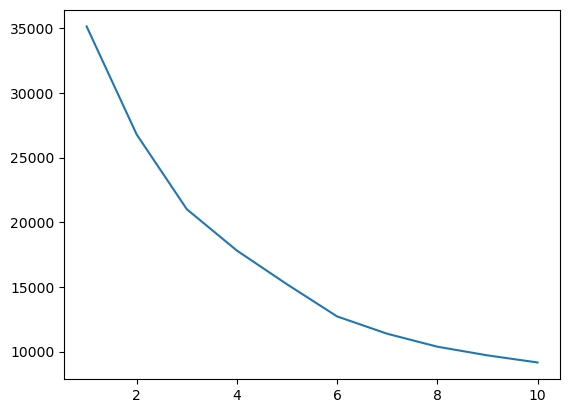

In [37]:
plt.plot(range(1,11),wcss)

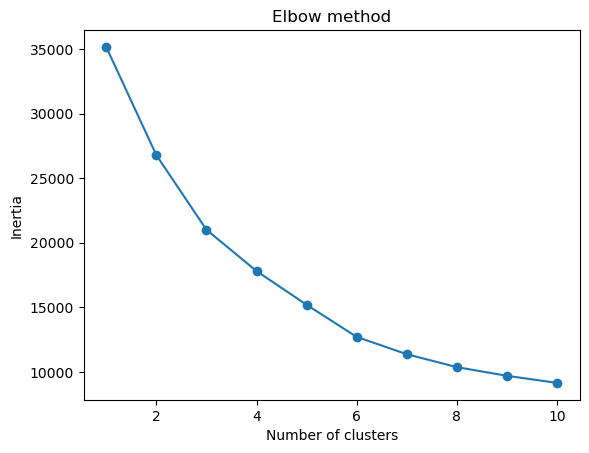

In [38]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=12)
    y = kmeans.fit_predict(sc)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [78]:
clusterer = KMeans(n_clusters=3, random_state=12,init='k-means++')
cluster_labels = clusterer.fit_predict(X)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
clusterer.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
df['K means'] = cluster_labels

In [42]:
df.groupby('K means').agg(['mean']).reset_index()

,K means,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5.295885e+04,8.557606e+10,0.057568,599.652595,0.032590,0.211593,0.528284,0.570211,0.065626,2.114150e+07,0.550091,2467.167165,1864.173668
1,1,4.445199e+06,1.294446e+13,0.153500,6492.714286,0.007071,0.635714,0.721429,0.673929,0.123571,3.735100e+08,0.780786,134667.642857,103017.071429
2,2,1.060284e+06,2.628153e+12,0.087052,2820.154639,0.008144,0.543299,0.928866,0.671515,0.154515,2.578502e+08,0.729794,33562.350515,44173.154639


In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [44]:
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =",3,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.9201913152336889


In [45]:
sample_silhouette_values = silhouette_samples(X, cluster_labels)
sample_silhouette_values

array([0.96245246, 0.9684515 , 0.96794728, ..., 0.96337826, 0.85011365,
       0.96742594])

In [46]:
cluster_freq = df['K means'].value_counts().sort_index()
cluster_freq

0    2593
1      14
2      97
Name: K means, dtype: int64

Hierachical Clusters

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

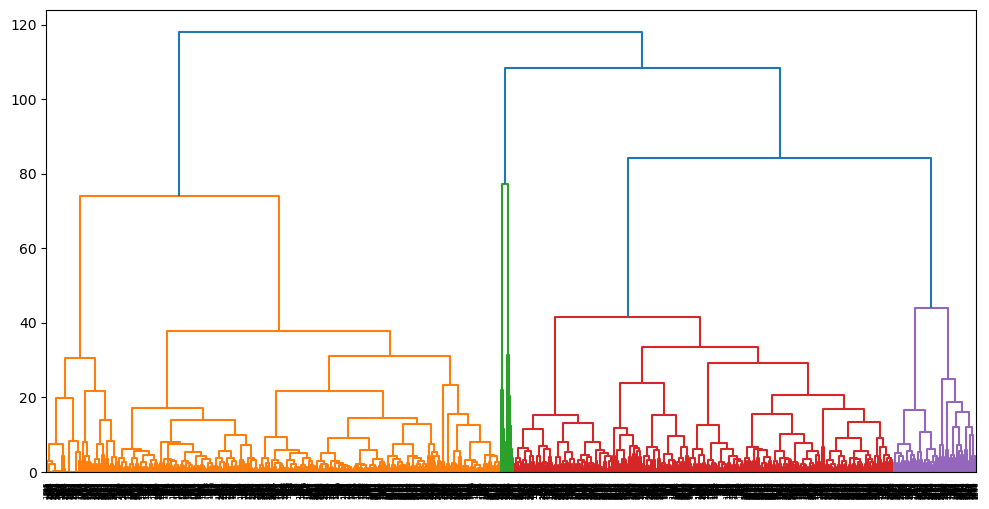

In [48]:
plt.figure(figsize = (12,6))
wardlink = linkage(sc,method = 'ward', metric='euclidean')
warddend = dendrogram(wardlink)

In [49]:
clusters = fcluster(wardlink,2, criterion='maxclust')
clusters

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [50]:
df['Hierachy cl'] = clusters

In [51]:
df.groupby('Hierachy cl').agg(['mean']).reset_index()

,Hierachy cl,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,K means
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,18260.632496,1.931694e+10,0.051849,178.111256,0.050748,0.079939,0.239244,0.475001,0.034766,1.821171e+07,0.427874,378.058048,310.325265,0.000000
1,2,201347.365716,4.576809e+11,0.066079,1218.443632,0.013246,0.365109,0.834848,0.669448,0.101972,4.412782e+07,0.681952,7987.313111,7344.853343,0.150507


In [52]:
silhouette_avg = silhouette_score(X, clusters)
print("For n_clusters =",2,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.10427995901643573


In [53]:
sample_silhouette_values = silhouette_samples(X, clusters)
sample_silhouette_values

array([ 0.88244572,  0.95714446,  0.95975413, ..., -0.89154815,
       -0.35838035, -0.95782225])

In [54]:
cluster_freq = df['Hierachy cl'].value_counts().sort_index()
cluster_freq

1    1322
2    1382
Name: Hierachy cl, dtype: int64

DB Scan clustering

In [68]:
dbscan = DBSCAN(eps=0.5,metric = 'euclidean')
dbscan.fit(sc)
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  1,  1, ..., -1, -1, -1], dtype=int64)

In [56]:
df['db scan'] = dbscan.labels_

In [57]:
df.head(1)

,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,K means,Hierachy cl,db scan
0,87931.0,5.479006e+10,0.035,60.0,0.034,0.0,0.0,0.619,0.039,31719449,0.599,102.0,193.0,0,1,-1


In [58]:
df.groupby('db scan').agg(['mean']).reset_index()

,db scan,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,K means,Hierachy cl
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,126238.880477,2.746849e+11,0.060785,800.485732,0.026836,0.254636,0.608611,0.594210,0.074456,3.406790e+07,0.584103,4809.473172,4406.342611,0.087029,1.578243
1,0,2761.812720,6.016248e+09,0.053244,24.760000,0.079908,0.001600,0.057120,0.526748,0.030620,1.446210e+07,0.302816,138.226480,113.029840,0.000000,1.000000
2,1,0.020000,2.038177e+09,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,8.460766e+05,0.020000,0.020000,0.020000,0.000000,1.000000
3,2,31.732308,2.000000e-02,0.020000,0.020000,0.020000,0.020000,0.017436,0.020000,0.020000,4.019856e+04,0.920436,232.345128,36.423590,0.000000,1.000000


In [59]:
cluster_freq = df['db scan'].value_counts().sort_index()
cluster_freq

-1    2390
 0     250
 1      25
 2      39
Name: db scan, dtype: int64

In [69]:
silhouette_avg = silhouette_score(X,dbscan.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.7619702384899797


Agglomerative  Clustering

In [75]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model.fit(sc)
clustering_model.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [76]:
silhouette_avg = silhouette_score(X,clustering_model.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.1270944560406312


In [80]:
import pickle
# open a file, where you ant to store the data
file = open('kmeans.pkl', 'wb') #opened for writing binary code.
# dump information to that file
pickle.dump(clusterer, file)
file.close()

In [81]:
# opening the pickle file 
model = open('kmeans.pkl','rb')
clu = pickle.load(model)
prediction = clu.fit_predict(X)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
df.columns 

Index(['CO2 Emissions', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
       'Infant Mortality Rate', 'Internet Usage', 'Mobile Phone Usage',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound', 'K means',
       'Hierachy cl', 'db scan'],
      dtype='object')

In [ ]:
X.columns

Index(['CO2 Emissions', 'GDP', 'Health Exp % GDP', 'Health Exp/Capita',
       'Infant Mortality Rate', 'Internet Usage', 'Mobile Phone Usage',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [121]:
%%writefile app.py
import streamlit as st
import pickle
from sklearn.cluster import KMeans

# Load the clustering model
model = pickle.load(open("kmeans.pkl", "rb"))

# Create a sidebar to allow the user to select the number of clusters
st.sidebar.header("Clustering Parameters")
num_clusters = st.sidebar.number_input("Number of Clusters", min_value=2, max_value=10)

def predict(CO2_Emissions, GDP, Health_Exp_GDP, Health_Exp_Capita,
            Infant_Mortality_Rate, Internet_Usage, Mobile_Phone_Usage,
            Population_15_64, Population_65, Population_Total,
            Population_Urban, Tourism_Inbound, Tourism_Outbound):
    data = [[CO2_Emissions, GDP, Health_Exp_GDP, Health_Exp_Capita,
             Infant_Mortality_Rate, Internet_Usage, Mobile_Phone_Usage,
             Population_15_64, Population_65, Population_Total,
             Population_Urban, Tourism_Inbound, Tourism_Outbound]]
    cluster = model.predict(data)
    return cluster[0]

def main():
    # Front-end elements of the web page
    st.header("Clustering Results")  
    # Get the user input data
    CO2_Emissions = st.number_input('CO2 Emissions')
    GDP = st.number_input('GDP')
    Health_Exp_GDP = st.number_input('Health Expenses /GDP')
    Health_Exp_Capita = st.number_input('Health Exp/Capita')
    Infant_Mortality_Rate = st.number_input('Infant Mortality Rate')
    Internet_Usage = st.number_input('Internet Usage')
    Mobile_Phone_Usage = st.number_input('Mobile Phone Usage')
    Population_15_64 = st.number_input('Population 15-64')
    Population_65 = st.number_input('Population 65')
    Population_Total = st.number_input('Population Total')
    Population_Urban = st.number_input('Population Urban')
    Tourism_Inbound = st.number_input('Tourism Inbound')
    Tourism_Outbound = st.number_input('Tourism Outbound')
    result = ""

    # When predict button is clicked
    if st.button('Find Clusters'):
        result = predict(CO2_Emissions, GDP, Health_Exp_GDP, Health_Exp_Capita,
                          Infant_Mortality_Rate, Internet_Usage, Mobile_Phone_Usage,
                          Population_15_64, Population_65, Population_Total,
                          Population_Urban, Tourism_Inbound, Tourism_Outbound)
        st.success('Global development measurement cluster number {}'.format(result))


if __name__ == '__main__':
    main()

Overwriting app.py


In [122]:
!streamlit run app.py

^C


In [128]:
df[df['K means'] ==1]

,CO2 Emissions,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,K means,Hierachy cl,db scan
204,5713560.00,1.028970e+13,0.136,4790.0,0.007,0.4,0.4,0.663,0.124,282162411,0.791,120912.0,91473.0,1,2,-1
412,5601405.00,1.062530e+13,0.142,5138.0,0.007,0.5,0.4,0.665,0.123,284968955,0.792,109103.0,85610.0,1,2,-1
620,5650950.00,1.098020e+13,0.151,5578.0,0.007,0.6,0.5,0.667,0.123,287625193,0.794,104427.0,81860.0,1,2,-1
828,5681664.00,1.151220e+13,0.156,5993.0,0.007,0.6,0.5,0.669,0.123,290107933,0.796,101535.0,82091.0,1,2,-1
1036,5790765.00,1.227700e+13,0.157,6355.0,0.007,0.6,0.6,0.670,0.123,292805298,0.798,115689.0,94764.0,1,2,-1
1244,5826394.00,1.309540e+13,0.158,6732.0,0.007,0.7,0.7,0.671,0.123,295516599,0.799,127237.0,100250.0,1,2,-1
1452,5737616.00,1.385790e+13,0.159,7110.0,0.007,0.7,0.8,0.672,0.124,298379912,0.801,133393.0,105476.0,1,2,-1
1660,5828697.00,1.448030e+13,0.161,7486.0,0.007,0.8,0.8,0.673,0.125,301231207,0.803,148846.0,111102.0,1,2,-1
1868,5656839.00,1.472030e+13,0.165,7769.0,0.007,0.7,0.9,0.673,0.127,304093966,0.804,170524.0,119217.0,1,2,-1
2076,5311840.00,1.441790e+13,0.177,8009.0,0.006,0.7,0.9,0.672,0.128,306771529,0.806,149510.0,106285.0,1,2,-1
